In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df_export = pd.read_csv("2010_2021_HS2_export.csv")
df_import = pd.read_csv("2010_2021_HS2_import.csv")

In [4]:
df_export.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 184755 entries, 0 to 184754
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   HSCode     184755 non-null  int64  
 1   Commodity  184755 non-null  object 
 2   value      165497 non-null  float64
 3   country    184755 non-null  object 
 4   year       184755 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 7.0+ MB


In [5]:
df_import.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101051 entries, 0 to 101050
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   HSCode     101051 non-null  int64  
 1   Commodity  101051 non-null  object 
 2   value      85306 non-null   float64
 3   country    101051 non-null  object 
 4   year       101051 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 3.9+ MB


# Year wise total export and import

In [6]:
year_wise_export = df_export.groupby("year").sum()["value"].reset_index()
year_wise_import = df_import.groupby("year").sum()["value"].reset_index()

In [7]:
year_trade = pd.merge(left = year_wise_export,right = year_wise_import,how = "inner",on = "year")
year_trade.rename(columns = {"value_x":"total export","value_y":"total import"},inplace = True)

<Axes: xlabel='year'>

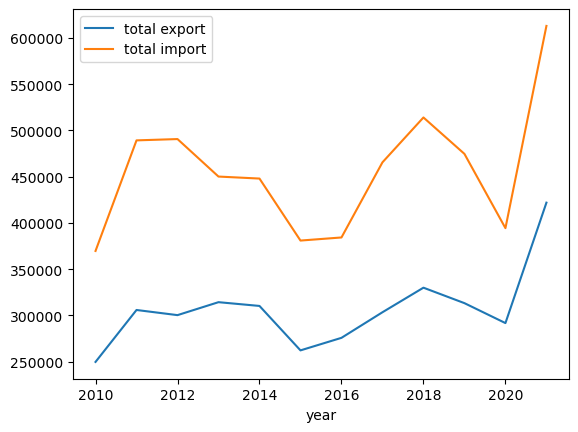

In [8]:
year_trade.plot(x = "year",y = ["total export","total import"])

# How coverage ratio (export/import) is changing with years

In [9]:
year_trade["coverage"] = year_trade["total export"]/year_trade["total import"]

<Axes: xlabel='year'>

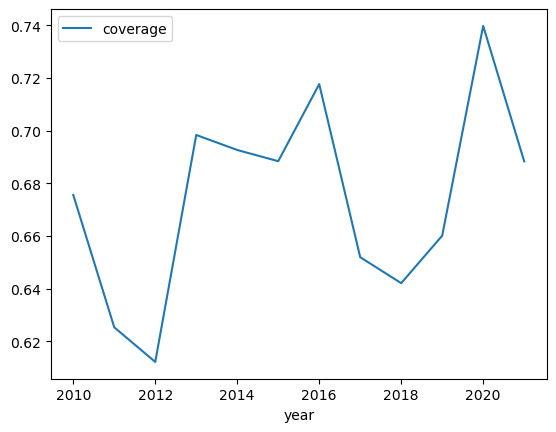

In [10]:
year_trade.plot(x = "year",y = "coverage")

# What did India import the most in any given year?

In [11]:
def get_rank(df,year):
    df = df[df["year"] == year].sort_values(by = "value",ascending = False)
    return df["HSCode"].to_list()[0:3]

In [12]:
import_commodities = df_import.groupby(["year","HSCode"]).sum()["value"].reset_index()
import_commodities.sort_values(by = ["year","value"],inplace  = True)

In [13]:
top_import_categories = {}
for i in range(2010,2022):
    top_import_categories[i] = get_rank(import_commodities,i)

In [14]:
top_import_categories

{2010: [27, 71, 84],
 2011: [27, 71, 84],
 2012: [27, 71, 84],
 2013: [27, 71, 84],
 2014: [27, 71, 85],
 2015: [27, 71, 85],
 2016: [27, 71, 85],
 2017: [27, 71, 85],
 2018: [27, 71, 85],
 2019: [27, 71, 85],
 2020: [27, 71, 85],
 2021: [27, 71, 85]}

In [15]:
pd.DataFrame(data = top_import_categories,index = ["First ranked commodity","Second ranked commodity","Third rnked commodity"])

,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
First ranked commodity,27,27,27,27,27,27,27,27,27,27,27,27
Second ranked commodity,71,71,71,71,71,71,71,71,71,71,71,71
Third rnked commodity,84,84,84,84,85,85,85,85,85,85,85,85


# What did India export the most in any given year?

In [16]:
export_commodities = df_export.groupby(["year","HSCode"]).sum()["value"].reset_index()
export_commodities.sort_values(by = ["year","value"],inplace  = True)

In [17]:
top_export_categories = {}
for i in range(2010,2022):
    top_export_categories[i] = get_rank(export_commodities,i)

In [18]:
top_export_categories

{2010: [71, 27, 99],
 2011: [27, 71, 99],
 2012: [27, 71, 87],
 2013: [27, 71, 87],
 2014: [27, 71, 87],
 2015: [71, 27, 87],
 2016: [71, 27, 87],
 2017: [71, 27, 84],
 2018: [27, 71, 84],
 2019: [27, 71, 84],
 2020: [27, 71, 30],
 2021: [27, 71, 84]}

In [19]:
pd.DataFrame(data = top_export_categories,index = ["First ranked commodity","Second ranked commodity","Third rnked commodity"])

,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
First ranked commodity,71,27,27,27,27,71,71,71,27,27,27,27
Second ranked commodity,27,71,71,71,71,27,27,27,71,71,71,71
Third rnked commodity,99,99,87,87,87,87,87,84,84,84,30,84


# Top import countries

In [20]:
def get_country_rank(df,year):
    df = df[df["year"] == year].sort_values(by = "value",ascending = False)
    return df["country"].to_list()[0:3]

In [21]:
import_countries = df_import.groupby(["year","country"]).sum()["value"].reset_index()
import_countries.sort_values(by = ["year","value"],inplace  = True)

In [22]:
top_import_countries = {}
for i in range(2010,2022):
    top_import_countries[i] = get_country_rank(import_countries,i)

In [23]:
top_import_countries

{2010: ['CHINA P RP', 'U ARAB EMTS', 'SWITZERLAND'],
 2011: ['CHINA P RP', 'U ARAB EMTS', 'SWITZERLAND'],
 2012: ['CHINA P RP', 'U ARAB EMTS', 'SAUDI ARAB'],
 2013: ['CHINA P RP', 'SAUDI ARAB', 'U ARAB EMTS'],
 2014: ['CHINA P RP', 'SAUDI ARAB', 'U ARAB EMTS'],
 2015: ['CHINA P RP', 'U S A', 'SAUDI ARAB'],
 2016: ['CHINA P RP', 'U S A', 'U ARAB EMTS'],
 2017: ['CHINA P RP', 'U S A', 'SAUDI ARAB'],
 2018: ['CHINA P RP', 'U S A', 'U ARAB EMTS'],
 2019: ['CHINA P RP', 'U S A', 'U ARAB EMTS'],
 2020: ['CHINA P RP', 'U S A', 'U ARAB EMTS'],
 2021: ['CHINA P RP', 'U ARAB EMTS', 'U S A']}

In [24]:
pd.DataFrame(data = top_import_countries,index = ["First ranked country","Second ranked country","Third ranked country"])

,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
First ranked country,CHINA P RP,CHINA P RP,CHINA P RP,CHINA P RP,CHINA P RP,CHINA P RP,CHINA P RP,CHINA P RP,CHINA P RP,CHINA P RP,CHINA P RP,CHINA P RP
Second ranked country,U ARAB EMTS,U ARAB EMTS,U ARAB EMTS,SAUDI ARAB,SAUDI ARAB,U S A,U S A,U S A,U S A,U S A,U S A,U ARAB EMTS
Third ranked country,SWITZERLAND,SWITZERLAND,SAUDI ARAB,U ARAB EMTS,U ARAB EMTS,SAUDI ARAB,U ARAB EMTS,SAUDI ARAB,U ARAB EMTS,U ARAB EMTS,U ARAB EMTS,U S A


# Top export countries

In [25]:
export_countries = df_export.groupby(["year","country"]).sum()["value"].reset_index()
export_countries.sort_values(by = ["year","value"],inplace  = True)

In [26]:
top_export_countries = {}
for i in range(2010,2022):
    top_export_countries[i] = get_country_rank(export_countries,i)

In [27]:
top_export_countries

{2010: ['U ARAB EMTS', 'U S A', 'UNSPECIFIED'],
 2011: ['U ARAB EMTS', 'U S A', 'CHINA P RP'],
 2012: ['U ARAB EMTS', 'U S A', 'SINGAPORE'],
 2013: ['U S A', 'U ARAB EMTS', 'CHINA P RP'],
 2014: ['U S A', 'U ARAB EMTS', 'HONG KONG'],
 2015: ['U S A', 'U ARAB EMTS', 'HONG KONG'],
 2016: ['U S A', 'U ARAB EMTS', 'HONG KONG'],
 2017: ['U S A', 'U ARAB EMTS', 'HONG KONG'],
 2018: ['U S A', 'U ARAB EMTS', 'CHINA P RP'],
 2019: ['U S A', 'U ARAB EMTS', 'CHINA P RP'],
 2020: ['U S A', 'CHINA P RP', 'U ARAB EMTS'],
 2021: ['U S A', 'U ARAB EMTS', 'CHINA P RP']}

In [28]:
pd.DataFrame(data = top_export_countries,index = ["First ranked country","Second ranked country","Third ranked country"])

,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
First ranked country,U ARAB EMTS,U ARAB EMTS,U ARAB EMTS,U S A,U S A,U S A,U S A,U S A,U S A,U S A,U S A,U S A
Second ranked country,U S A,U S A,U S A,U ARAB EMTS,U ARAB EMTS,U ARAB EMTS,U ARAB EMTS,U ARAB EMTS,U ARAB EMTS,U ARAB EMTS,CHINA P RP,U ARAB EMTS
Third ranked country,UNSPECIFIED,CHINA P RP,SINGAPORE,CHINA P RP,HONG KONG,HONG KONG,HONG KONG,HONG KONG,CHINA P RP,CHINA P RP,U ARAB EMTS,CHINA P RP
